## **Customer Behavior Analysis for Targeted Marketing Using K-Means**

### **Different Stages:**
1. **Importing Libraries.**
2. **Data Exploration.**
3. **Data Visualization.**
4. **Clustering using K-Means.**
5. **3D Plot of Clusters.**

### **Stage 1: Importing Libraries**

In [59]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

### **Stage 2: Data Exploration**

In [60]:
df = pd.read_csv(r'C:\Users\Vedant\Desktop\Portfolio\Customer Behavior Analysis for Targeted Marketing Using K-Means\Dataset\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [61]:
df.shape

(200, 5)

In [62]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [63]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [64]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### **Stage 3: Data Visualization**

In [65]:
plt.style.use('fivethirtyeight')

**Histograms**

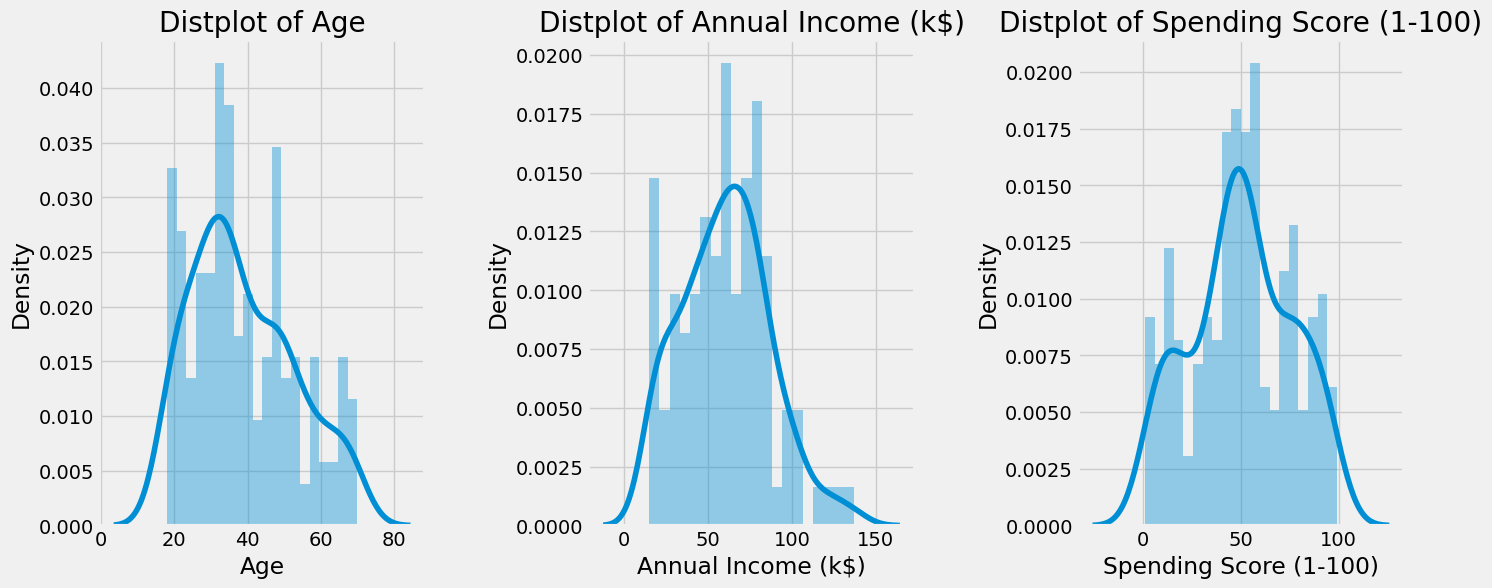

In [66]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

**Count Plot of Gender**

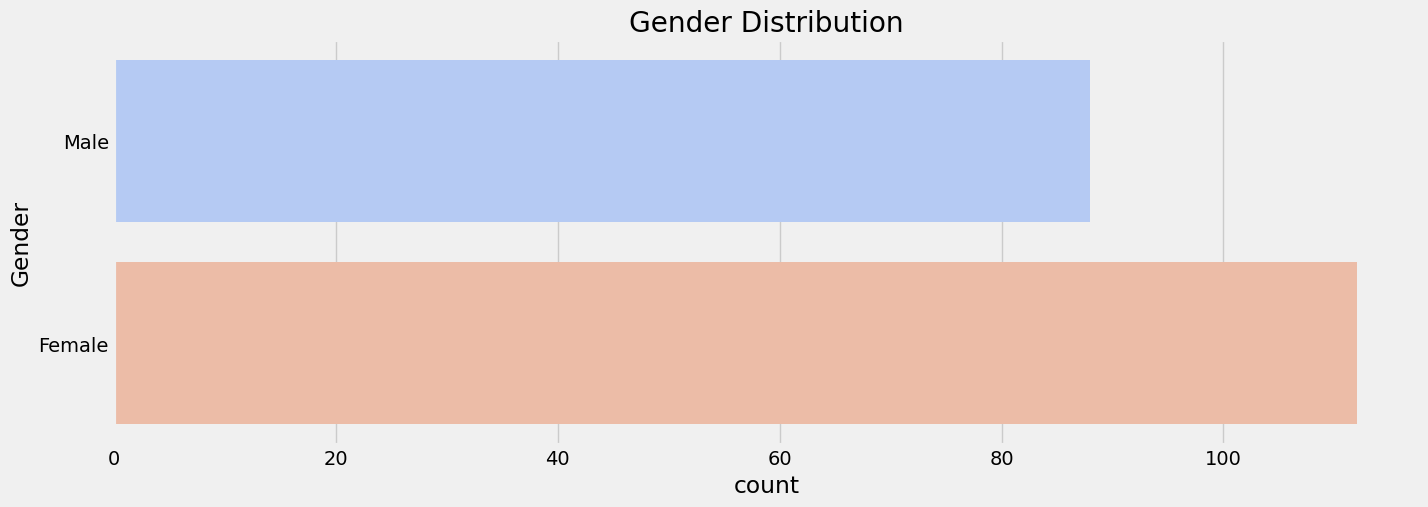

In [67]:
plt.figure(1, figsize=(15, 5))
sns.countplot(y='Gender', data=df, palette='coolwarm')  # Custom color palette
plt.title('Gender Distribution')
plt.show()

**Ploting the Relation between Age , Annual Income and Spending Score**

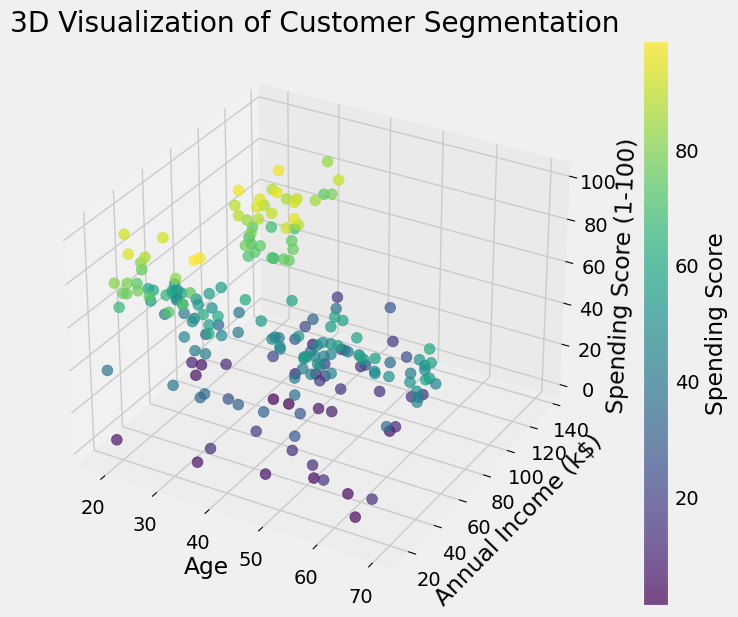

In [68]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],
                     c=df['Spending Score (1-100)'], cmap='viridis', s=60, alpha=0.7)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.colorbar(scatter, ax=ax, label='Spending Score')
plt.title('3D Visualization of Customer Segmentation')
plt.show()

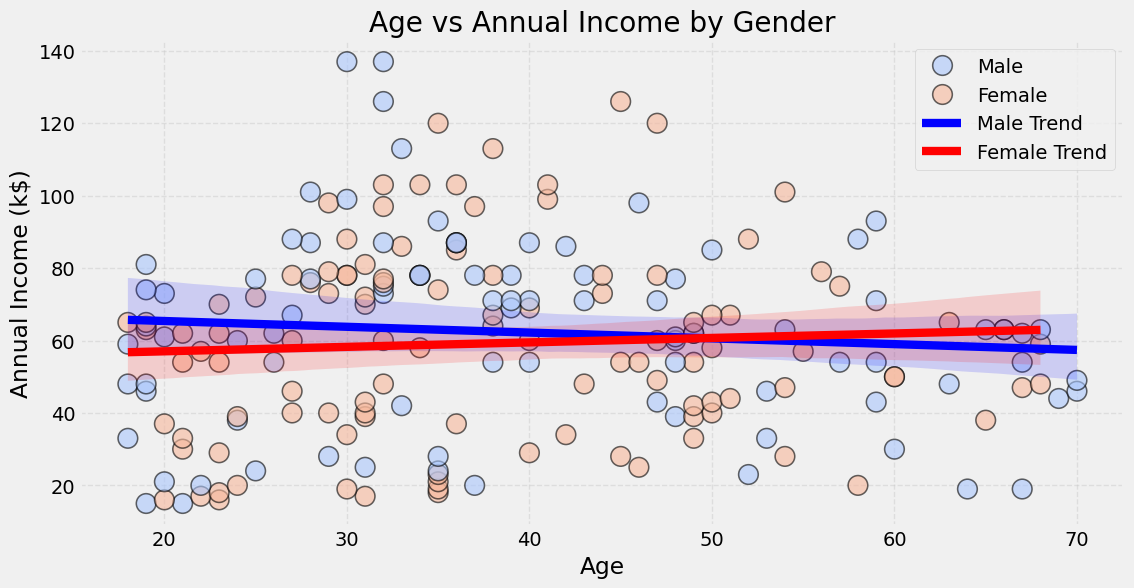

In [69]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, hue='Gender',
                palette='coolwarm', s=200, alpha=0.6, edgecolor='black')
sns.regplot(x='Age', y='Annual Income (k$)', data=df[df['Gender'] == 'Male'], 
            scatter=False, color='blue', label='Male Trend')
sns.regplot(x='Age', y='Annual Income (k$)', data=df[df['Gender'] == 'Female'], 
            scatter=False, color='red', label='Female Trend')

plt.title('Age vs Annual Income by Gender')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


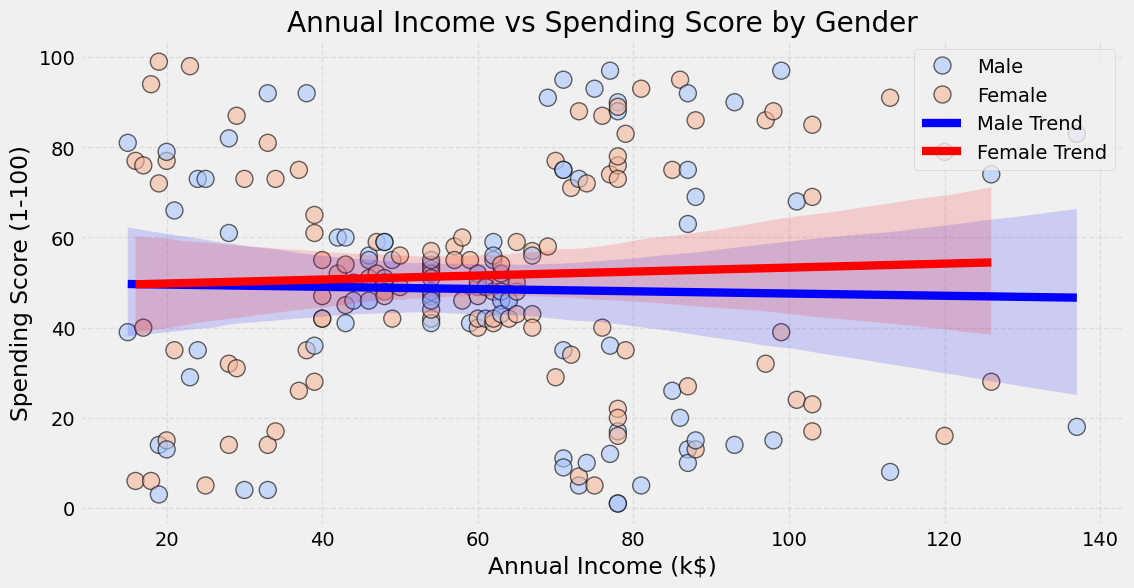

In [70]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                data=df, hue='Gender', 
                palette='coolwarm', s=150, alpha=0.6, edgecolor='black', marker='o')
sns.regplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
            data=df[df['Gender'] == 'Male'], scatter=False, color='blue', label='Male Trend')
sns.regplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
            data=df[df['Gender'] == 'Female'], scatter=False, color='red', label='Female Trend')

plt.title('Annual Income vs Spending Score by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**Distribution of values in Age , Annual Income and Spending Score according to Gender**

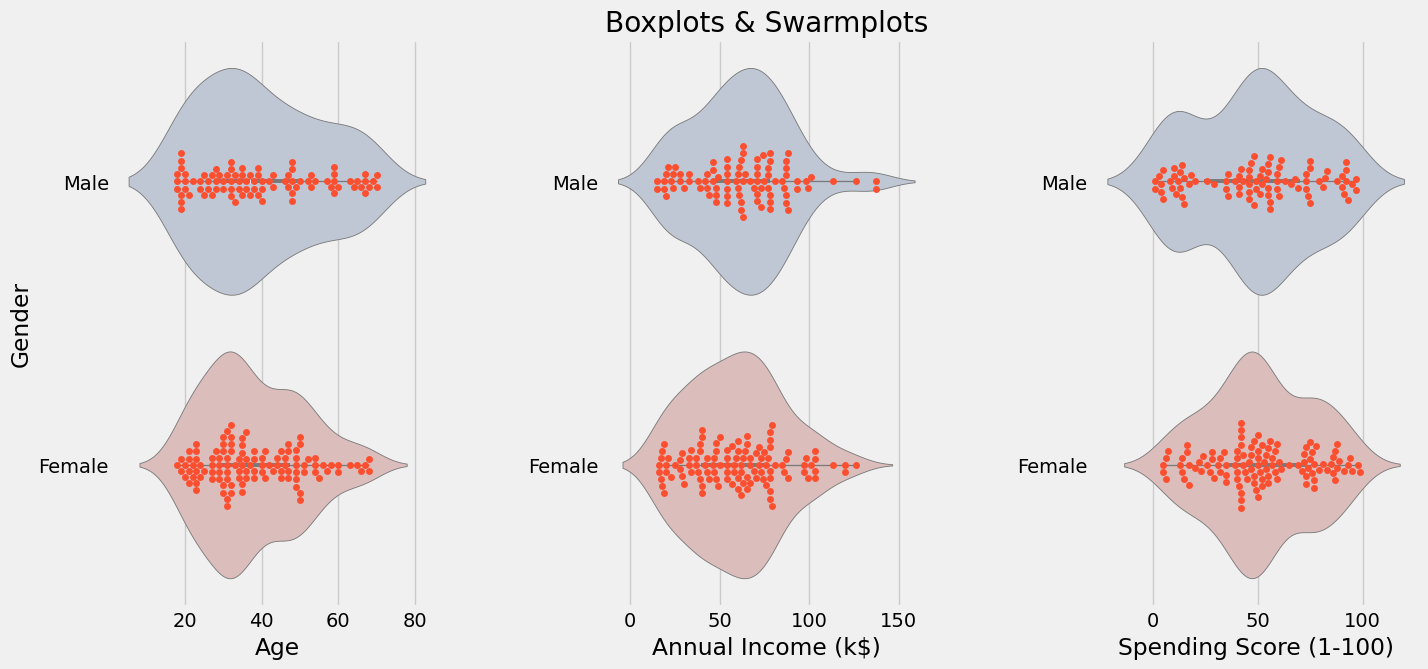

In [71]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

### **Stage 4: Clustering using K-Means**

**1.Segmentation using Age and Spending Score**

In [72]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

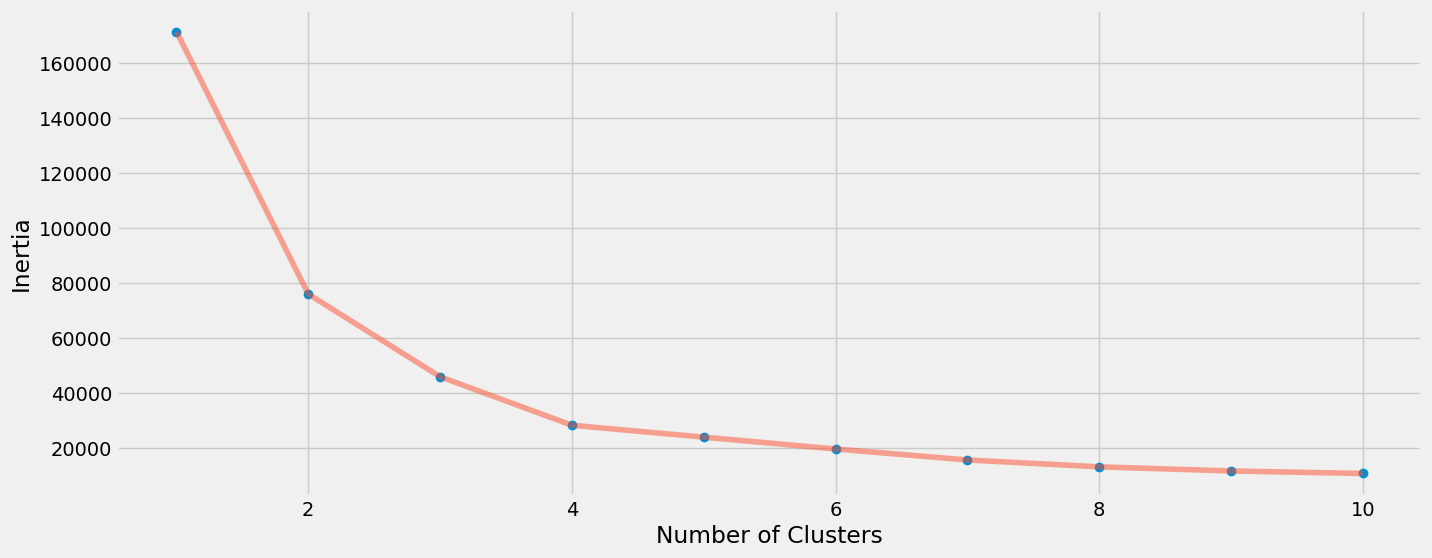

In [73]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [74]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

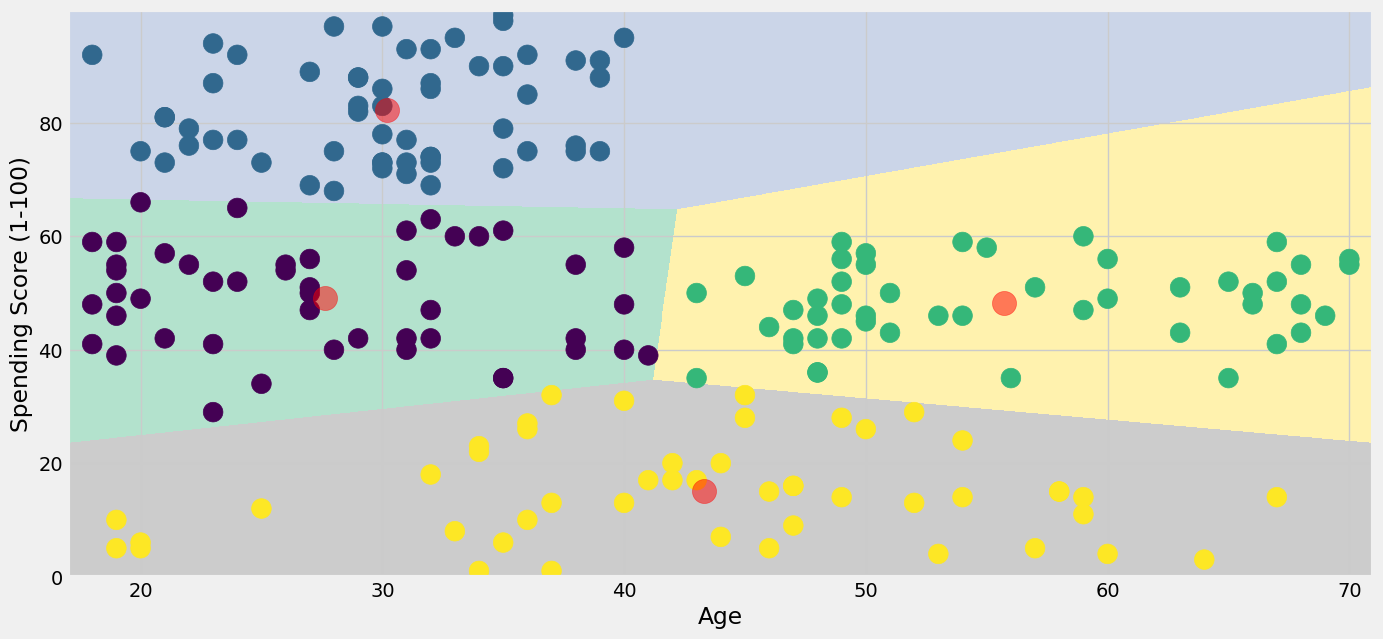

In [75]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

**2. Segmentation using Annual Income and Spending Score**

In [76]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

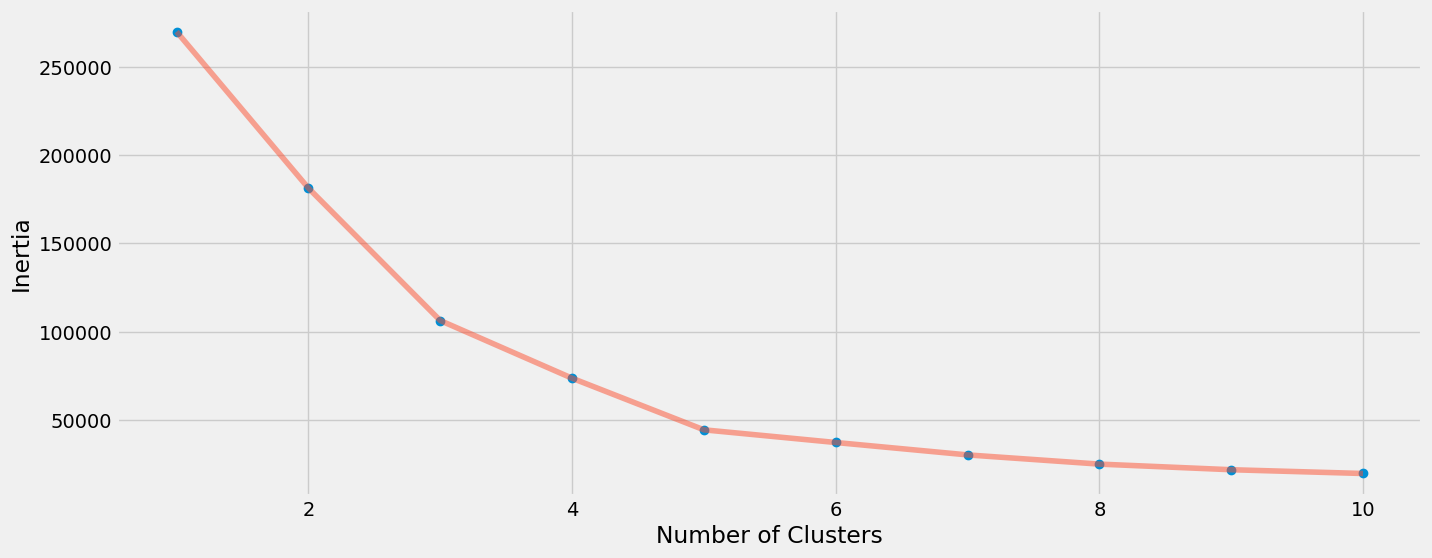

In [77]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [78]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [79]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

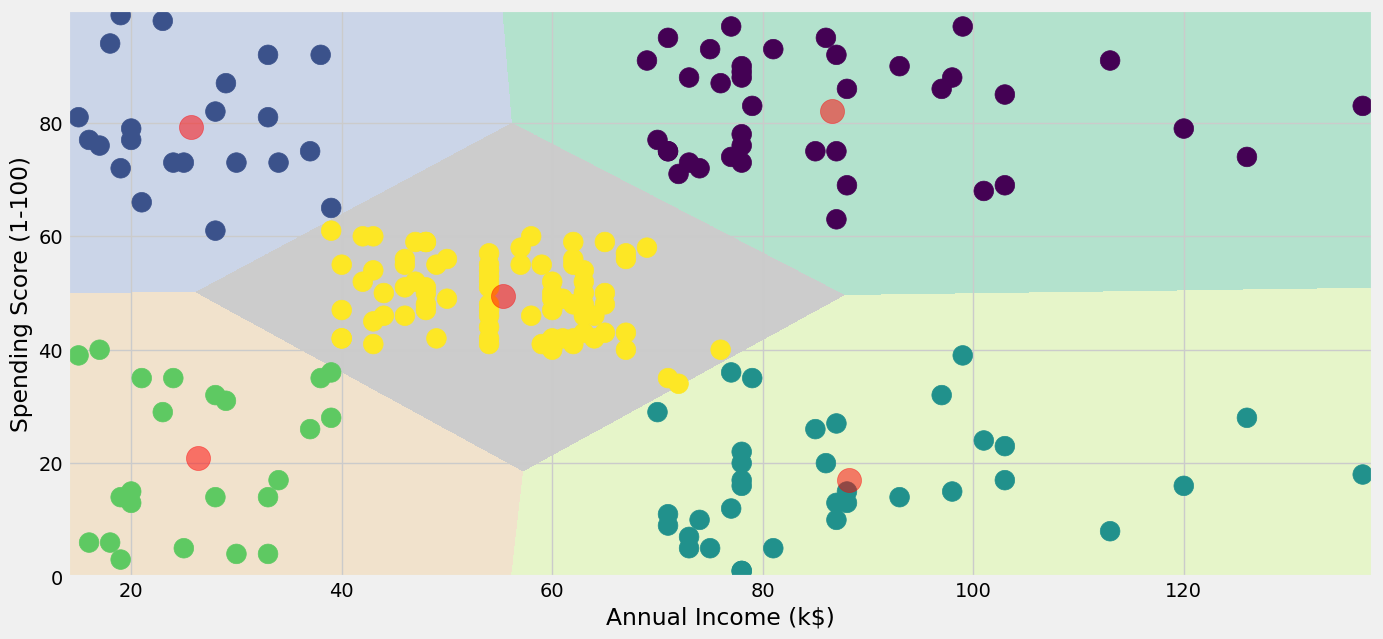

In [80]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

**3.Segmentation using Age , Annual Income and Spending Score**

In [81]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

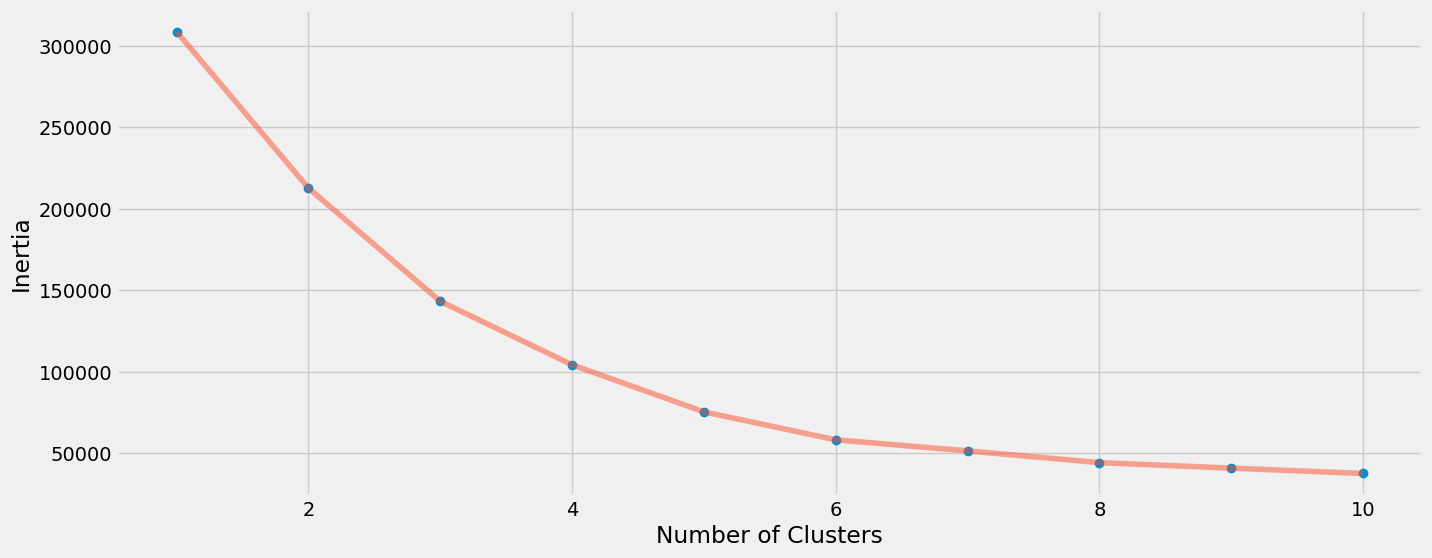

In [82]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [83]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

### **Stage 5: 3D Visualization**

In [87]:
df['label3'] = labels3
trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    z=df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=df['label3'], 
        colorscale='Viridis',     
        size=20,
        line=dict(
            color=df['label3'],
            width=12
        ),
        opacity=0.8
    )
)
data = [trace1]
layout = go.Layout(
    title='Clusters',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()
